In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math
from datetime import datetime
from datetime import timedelta

In [3]:
df = pd.read_csv(r"D:\BE Project\Predictive_Maintaience_Dataset.csv")
df.head()

,Serial No,Item Name,No of hours before maintainance,Avg hours of use each day,No of days after last maintenance,No of days before next maintenance,Year of Purchase
0,1,Boiler,1000,5.0,60,140.000000,2015
1,2,Boiler,1200,5.5,72,146.181818,2013
2,3,Boiler,1238,6.0,67,139.333333,2017
3,4,Boiler,1100,6.5,56,113.230769,2014
4,5,Boiler,800,7.0,45,69.285714,2008


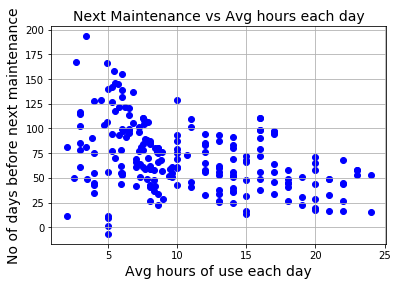

In [4]:
plt.scatter(df['Avg hours of use each day'],df['No of days before next maintenance'],color = 'blue')
plt.title('Next Maintenance vs Avg hours each day', fontsize = 14)
plt.xlabel('Avg hours of use each day',fontsize = 14)
plt.ylabel('No of days before next maintenance',fontsize = 14)
plt.grid(True)
plt.show()

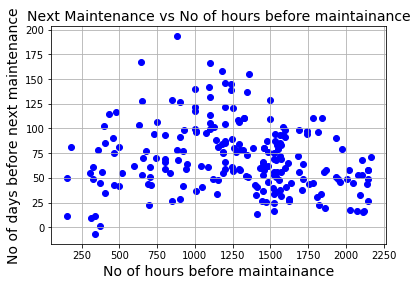

In [5]:
plt.scatter(df['No of hours before maintainance'],df['No of days before next maintenance'],color = 'blue')
plt.title('Next Maintenance vs No of hours before maintainance', fontsize = 14)
plt.xlabel('No of hours before maintainance',fontsize = 14)
plt.ylabel('No of days before next maintenance',fontsize = 14)
plt.grid(True)
plt.show()

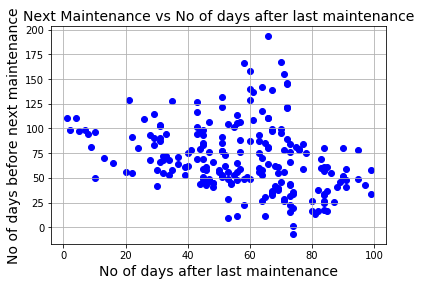

In [6]:
plt.scatter(df['No of days after last maintenance'],df['No of days before next maintenance'],color = 'blue')
plt.title('Next Maintenance vs No of days after last maintenance', fontsize = 14)
plt.xlabel('No of days after last maintenance',fontsize = 14)
plt.ylabel('No of days before next maintenance',fontsize = 14)
plt.grid(True)
plt.show()

In [7]:
df.corr()

,Serial No,No of hours before maintainance,Avg hours of use each day,No of days after last maintenance,No of days before next maintenance,Year of Purchase
Serial No,1.000000,0.655788,0.815195,-0.259143,-0.433854,0.176978
No of hours before maintainance,0.655788,1.000000,0.904227,0.042624,-0.140954,0.265427
Avg hours of use each day,0.815195,0.904227,1.000000,-0.123127,-0.413360,0.240974
No of days after last maintenance,-0.259143,0.042624,-0.123127,1.000000,-0.284195,0.098599
No of days before next maintenance,-0.433854,-0.140954,-0.413360,-0.284195,1.000000,-0.111739
Year of Purchase,0.176978,0.265427,0.240974,0.098599,-0.111739,1.000000


In [8]:
X = df[['No of hours before maintainance','Avg hours of use each day','No of days after last maintenance']]
Y = df['No of days before next maintenance']

In [9]:
from sklearn import linear_model
my_mlmodel = linear_model.LinearRegression()
my_mlmodel.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
print("Intercept \n",my_mlmodel.intercept_)
print("Intercept \n",my_mlmodel.coef_)

Intercept 
 109.65061033000762
Intercept 
 [  0.12617291 -13.27976588  -1.0049943 ]


In [16]:
New_Hours_bef_maintenance = int(input("No of hours before maintenance: "))
New_Avg_hours = input("Average hours used per day: ")
New_Avg_hours = float(New_Avg_hours)
New_Days_after_last_maintenance = int(input("No of days after last maintenance: "))
result = my_mlmodel.predict([[New_Hours_bef_maintenance,New_Avg_hours,New_Days_after_last_maintenance]])
result = math.floor(result)
today = datetime.today().strftime('%Y-%m-%d')
todaystring = str(today)
begindate = datetime.strptime(todaystring, "%Y-%m-%d")
enddate = begindate+timedelta(days=result)
enddatestring = str(enddate)
maintenancedate = enddatestring[0:10:]
print(f"Number of days: {result}")
print(f"Today's Date: {todaystring}")
print(f"Date of Maintenance {maintenancedate}")

No of hours before maintenance: 720
Average hours used per day: 5.8
No of days after last maintenance: 73
Number of days: 50
Today's Date: 2021-05-22
Date of Maintenance 2021-07-11


In [13]:
X = df[['No of hours before maintainance','Avg hours of use each day','No of days after last maintenance']]
Y = df['No of days before next maintenance']
model = (smf.ols(formula = "Y ~ X",data = df)).fit()
predictions = model.predict(X)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     275.1
Date:                Sat, 22 May 2021   Prob (F-statistic):           4.12e-72
Time:                        12:39:06   Log-Likelihood:                -881.67
No. Observations:                 212   AIC:                             1771.
Df Residuals:                     208   BIC:                             1785.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.6506      4.038     27.152      0.0